## Variable selection 7: SHAP values

This notebook goes with the blog post: Variable selection in Python, part III.

### Preliminaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LinearRegression

### Data loading

In [2]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv').astype('float64')

In [3]:
data = data.loc[:, ['Production', 'Position', 'Gross pay transform', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay']]
data.head()

,Production,Position,Gross pay transform,Phi-h,Pressure,Random 1,Random 2,Gross pay
0,15.10,2.1,3.54,0.5,19.0,5.0,379.0,0.1
1,21.30,1.1,5.79,4.0,16.0,13.0,269.0,1.0
2,22.75,1.0,8.51,19.0,14.0,12.0,245.0,1.9
3,15.72,2.1,11.52,21.7,17.0,6.0,273.0,3.1
4,7.71,2.9,10.16,24.6,11.0,10.0,237.0,4.1


### SHAP values with linear regression (with and without asumption of correlated features)

__From the documentation:__  
        There are two ways we might want to compute SHAP values, either the full conditional SHAP
        values or the independent SHAP values. For independent SHAP values we break any
        dependence structure between features in the model and so uncover how the model would behave if we
        intervened and changed some of the inputs. For the full conditional SHAP values we respect
        the correlations among the input features, so if the model depends on one input but that
        input is correlated with another input, then both get some credit for the model's behavior. The
        independent option stays "true to the model" meaning it will only give credit to features that are
        actually used by the model, while the correlation option stays "true to the data" in the sense that
        it only considers how the model would behave when respecting the correlations in the input data.

In [4]:
X, y = data.drop('Production',axis=1), data['Production']

In [5]:
LR= LinearRegression()
LR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
explainer_L = shap.LinearExplainer(LR, X, feature_dependence="correlation")
shap_values = explainer_L.shap_values(X)

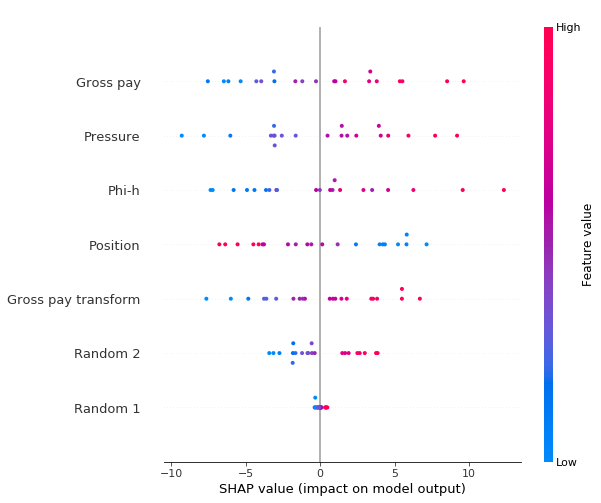

In [7]:
shap.summary_plot(shap_values, X, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

In [8]:
explainer_L = shap.LinearExplainer(LR, X, feature_dependence="independent")
shap_values = explainer_L.shap_values(X)

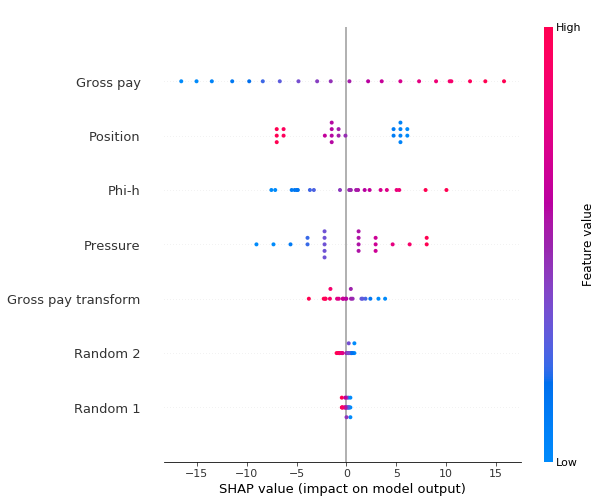

In [9]:
shap.summary_plot(shap_values, X, show=False)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

### Making a modified feature importance plot with 'smart' colourmap

In [10]:
def normalise(arr):
    return (arr-np.amin(arr))/(np.amax(arr)-np.amin(arr))

In [11]:
shap_values_abs = np.absolute(shap_values)
scaled = normalise(shap_values_abs.mean(axis = 0))
idx = np.argsort(scaled)
means = np.array(scaled)[idx]
names = np.array(list(data.drop('Production',axis=1)))[idx]

In [12]:
c = plt.cm.get_cmap('viridis', len(means)+1)

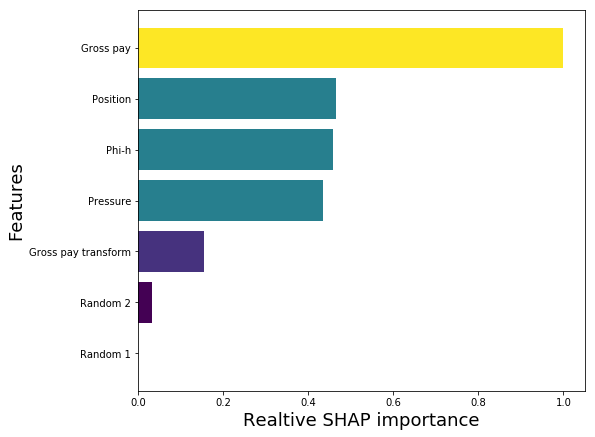

In [13]:
plt.figure(figsize=(8,7))
plt.ylabel('Features', fontsize=18)
plt.xlabel('Realtive SHAP importance', fontsize=18)
plt.barh(names.astype(str), means, color = c(means));